In [ ]:
import pandas as pd
import os, sys 
sys.path.append(os.getcwd()[:-9])  # add repo root to path
from utils import get_repo_root
import matplotlib.pyplot as plt
from utils.ml_functions import fit_predict_best_study_from_json
from utils.ml_functions import OptunaTuner

repo_root = get_repo_root()

In [7]:
input_set = pd.read_csv(str(repo_root) + '/data/features_all.csv')
ref_test = pd.read_csv(str(repo_root) + '/data/referance_data_test.csv')
ref = pd.read_csv(str(repo_root) + '/data/referance_data.csv')

In [4]:
input_set.head()

,cust_id,ref_date,mobile_eft_all_cnt_l0m,mobile_eft_all_cnt_l2m,mobile_eft_all_cnt_l5m,mobile_eft_all_cnt_l8m,mobile_eft_all_cnt_l1year,mobile_eft_all_cnt_l2years,mobile_eft_all_cnt_l4years,active_product_category_nbr_l0m,...,province_GRO,province_LIM,province_NOB,province_NOH,province_OVE,province_UTR,province_ZEE,province_ZUI,age_bin,tenure_bin
0,0,2017-09-01,1.0,4.0,7.0,5.0,13.0,17.0,0.0,2.0,...,0,0,0,1,0,0,0,0,9,2
1,1,2019-02-01,0.0,1.0,8.0,3.0,4.0,23.0,22.0,3.0,...,0,0,0,0,0,0,0,1,7,1
2,2,2019-01-01,1.0,5.0,7.0,3.0,5.0,32.0,34.0,3.0,...,0,0,1,0,0,0,0,0,8,4
3,3,2018-10-01,2.0,2.0,3.0,6.0,9.0,16.0,19.0,3.0,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-03-01,4.0,9.0,10.0,10.0,14.0,17.0,5.0,2.0,...,0,0,0,0,0,0,0,1,1,2


In [5]:
input_set_with_labels = input_set.merge(ref, on=['cust_id', 'ref_date'], how='left')
training_data = input_set_with_labels[input_set_with_labels['churn'].notna()]
test_data = input_set_with_labels[input_set_with_labels['churn'].isna()]

In [6]:
test_data

,cust_id,ref_date,mobile_eft_all_cnt_l0m,mobile_eft_all_cnt_l2m,mobile_eft_all_cnt_l5m,mobile_eft_all_cnt_l8m,mobile_eft_all_cnt_l1year,mobile_eft_all_cnt_l2years,mobile_eft_all_cnt_l4years,active_product_category_nbr_l0m,...,province_LIM,province_NOB,province_NOH,province_OVE,province_UTR,province_ZEE,province_ZUI,age_bin,tenure_bin,churn
1,1,2019-02-01,0.0,1.0,8.0,3.0,4.0,23.0,22.0,3.0,...,0,0,0,0,0,0,1,7,1,NaN
2,2,2019-01-01,1.0,5.0,7.0,3.0,5.0,32.0,34.0,3.0,...,0,1,0,0,0,0,0,8,4,NaN
8,9,2019-03-01,1.0,3.0,6.0,5.0,6.0,33.0,76.0,2.0,...,0,0,0,0,0,0,0,6,4,NaN
14,15,2019-06-01,0.0,1.0,3.0,6.0,11.0,32.0,30.0,3.0,...,1,0,0,0,0,0,0,8,1,NaN
18,19,2019-01-01,1.0,2.0,5.0,6.0,7.0,29.0,25.0,3.0,...,0,1,0,0,0,0,0,7,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176248,199951,2019-03-01,4.0,5.0,10.0,4.0,12.0,26.0,26.0,3.0,...,0,0,0,0,0,0,1,1,0,NaN
176249,199952,2019-05-01,1.0,2.0,3.0,0.0,0.0,17.0,10.0,3.0,...,0,0,1,0,0,0,0,3,4,NaN
176260,199963,2019-05-01,5.0,11.0,19.0,19.0,5.0,66.0,148.0,2.0,...,1,0,0,0,0,0,0,7,4,NaN
176261,199964,2019-03-01,5.0,6.0,12.0,7.0,5.0,16.0,19.0,3.0,...,0,0,0,0,0,1,0,6,1,NaN


In [7]:
training_data.dtypes[training_data.dtypes=='object']

ref_date    object
date        object
dtype: object

In [8]:
training_data

,cust_id,ref_date,mobile_eft_all_cnt_l0m,mobile_eft_all_cnt_l2m,mobile_eft_all_cnt_l5m,mobile_eft_all_cnt_l8m,mobile_eft_all_cnt_l1year,mobile_eft_all_cnt_l2years,mobile_eft_all_cnt_l4years,active_product_category_nbr_l0m,...,province_LIM,province_NOB,province_NOH,province_OVE,province_UTR,province_ZEE,province_ZUI,age_bin,tenure_bin,churn
0,0,2017-09-01,1.0,4.0,7.0,5.0,13.0,17.0,0.0,2.0,...,0,0,1,0,0,0,0,9,2,0.0
3,3,2018-10-01,2.0,2.0,3.0,6.0,9.0,16.0,19.0,3.0,...,0,0,0,0,0,0,1,0,0,0.0
4,5,2018-03-01,4.0,9.0,10.0,10.0,14.0,17.0,5.0,2.0,...,0,0,0,0,0,0,1,1,2,1.0
5,6,2018-04-01,6.0,12.0,13.0,13.0,17.0,102.0,37.0,2.0,...,0,0,1,0,0,0,0,4,3,1.0
6,7,2018-05-01,0.0,0.0,0.0,0.0,0.0,18.0,5.0,3.0,...,0,0,0,0,0,0,0,9,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176288,199995,2018-09-01,5.0,11.0,10.0,3.0,4.0,3.0,10.0,3.0,...,0,0,0,0,0,0,0,7,4,0.0
176289,199996,2018-06-01,1.0,7.0,9.0,5.0,7.0,25.0,6.0,2.0,...,0,0,0,0,0,0,0,5,0,0.0
176290,199997,2018-12-01,4.0,8.0,15.0,21.0,46.0,187.0,45.0,2.0,...,0,1,0,0,0,0,0,9,4,0.0
176291,199998,2018-02-01,6.0,14.0,11.0,15.0,17.0,28.0,2.0,3.0,...,0,0,0,0,0,0,1,2,2,1.0


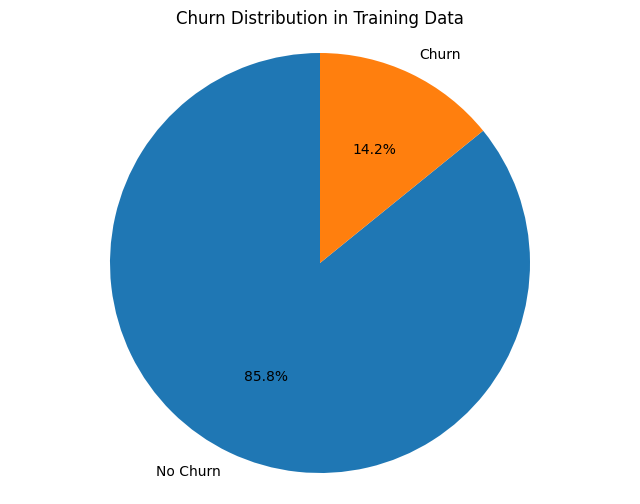

In [9]:
import matplotlib.pyplot as plt

# Count the values in churn column
churn_counts = training_data['churn'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution in Training Data')
plt.axis('equal')
plt.show()

## MODELLING

In [7]:
from utils.ml_functions import ing_hubs_datathon_metric 
from utils.ml_functions import OptunaTuner

In [11]:
training_data['ref_date']

0         2017-09-01
3         2018-10-01
4         2018-03-01
5         2018-04-01
6         2018-05-01
             ...    
176288    2018-09-01
176289    2018-06-01
176290    2018-12-01
176291    2018-02-01
176292    2018-06-01
Name: ref_date, Length: 133287, dtype: object

In [12]:
training_data.iloc[:, 2:-1]

,mobile_eft_all_cnt_l0m,mobile_eft_all_cnt_l2m,mobile_eft_all_cnt_l5m,mobile_eft_all_cnt_l8m,mobile_eft_all_cnt_l1year,mobile_eft_all_cnt_l2years,mobile_eft_all_cnt_l4years,active_product_category_nbr_l0m,active_product_category_nbr_l2m,active_product_category_nbr_l5m,...,province_GRO,province_LIM,province_NOB,province_NOH,province_OVE,province_UTR,province_ZEE,province_ZUI,age_bin,tenure_bin
0,1.0,4.0,7.0,5.0,13.0,17.0,0.0,2.0,4.0,6.0,...,0,0,0,1,0,0,0,0,9,2
3,2.0,2.0,3.0,6.0,9.0,16.0,19.0,3.0,6.0,9.0,...,0,0,0,0,0,0,0,1,0,0
4,4.0,9.0,10.0,10.0,14.0,17.0,5.0,2.0,4.0,6.0,...,0,0,0,0,0,0,0,1,1,2
5,6.0,12.0,13.0,13.0,17.0,102.0,37.0,2.0,4.0,7.0,...,0,0,0,1,0,0,0,0,4,3
6,0.0,0.0,0.0,0.0,0.0,18.0,5.0,3.0,6.0,9.0,...,0,0,0,0,0,0,0,0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176288,5.0,11.0,10.0,3.0,4.0,3.0,10.0,3.0,6.0,9.0,...,0,0,0,0,0,0,0,0,7,4
176289,1.0,7.0,9.0,5.0,7.0,25.0,6.0,2.0,4.0,8.0,...,0,0,0,0,0,0,0,0,5,0
176290,4.0,8.0,15.0,21.0,46.0,187.0,45.0,2.0,4.0,6.0,...,0,0,1,0,0,0,0,0,9,4
176291,6.0,14.0,11.0,15.0,17.0,28.0,2.0,3.0,6.0,9.0,...,0,0,0,0,0,0,0,1,2,2


## IN CASE OF KERNEL RESTART, RUN FROM HERE ##

In [ ]:
try:
    training_data
    # If training_data exists, use it
    X = training_data.drop(['cust_id', 'ref_date','date', 'churn'], axis=1)
    y = training_data['churn']

    X_test = test_data.drop(['cust_id', 'ref_date','date', 'churn'], axis=1)

    X.to_csv(str(repo_root) + '/data/X.csv', index=False)
    y.to_csv(str(repo_root) + '/data/y.csv', index=False)
    X_test.to_csv(str(repo_root) + '/data/submission_test.csv', index=False)
except NameError:
    # If training_data is not defined, load from files

    import pandas as pd
    import os, sys 
    sys.path.append(os.getcwd()[:-9])  # add repo root to path
    from utils import get_repo_root
    import matplotlib.pyplot as plt
    from utils.ml_functions import fit_predict_best_study_from_json
    from utils.ml_functions import OptunaTuner
    
    repo_root = get_repo_root()

    X = pd.read_csv(str(repo_root) + '/data/X.csv')
    y = pd.read_csv(str(repo_root) + '/data/y.csv')
    submission_test = pd.read_csv(str(repo_root) + '/data/submission_test.csv')

In [9]:
studies = {
     "None_XGBClassifier_LogLoss_INGHubsMetric": OptunaTuner(
        model_name="XGBoost",
        sampler=None,
        loss="binary:logistic",
        eval_metric="ing_hubs_datathon_metric",    # Used for CV scoring only
        n_trials=5,
        study_name="None_XGBClassifier_LogLoss_INGHubsMetric",
        save_dir="studies"  # Custom directory
    ),
    "RandomOverSampler_XGBClassifier_LogLoss_INGHubsMetric": OptunaTuner(
        model_name="XGBoost",
        sampler="RandomOverSampler",
        loss="binary:logistic",
        eval_metric="ing_hubs_datathon_metric",    # Used for CV scoring only
        n_trials=5,
        study_name="RandomOverSampler_XGBClassifier_LogLoss_INGHubsMetric",
        save_dir="studies"  # Custom directory
    ),
    "SMOTE_XGBClassifier_LogLoss_INGHubsMetric": OptunaTuner(
        model_name="XGBoost",
        sampler="SMOTE",
        loss="binary:logistic",
        eval_metric="ing_hubs_datathon_metric",    # Used for CV scoring only
        n_trials=5,
        study_name="SMOTE_XGBClassifier_LogLoss_INGHubsMetric",
        save_dir="studies"  # Custom directory
    ),
    "SMOTE_RandomForestClassifier_LogLoss_INGHubsMetric": OptunaTuner(
        model_name="RandomForest",
        sampler="SMOTE",        
        eval_metric="ing_hubs_datathon_metric",    # Used for CV scoring only
        n_trials=5,
        study_name="SMOTE_RandomForestClassifier_LogLoss_INGHubsMetric",
        save_dir="studies"  # Custom directory
    ),
    "SMOTE_Ensemble_LogLoss_INGHubsMetric": OptunaTuner(
        model_name="Ensemble",
        sampler="SMOTE",
        loss="binary:logistic",     
        eval_metric="ing_hubs_datathon_metric",    # Used for CV scoring only
        n_trials=5,
        study_name="SMOTE_Ensemble_LogLoss_INGHubsMetric",
        save_dir="studies"  # Custom directory
    ),
    "None_Ensemble_LogLoss_INGHubsMetric": OptunaTuner(
        model_name="Ensemble",
        sampler=None,
        loss="binary:logistic",     
        eval_metric="ing_hubs_datathon_metric",    # Used for CV scoring only
        n_trials=5,
        study_name="None_Ensemble_LogLoss_INGHubsMetric",
        save_dir="studies"  # Custom directory
    ),    
}

In [ ]:
from sklearn.model_selection import train_test_split

X_train, y_train = X, y

In [12]:
import json
import numpy as np

def get_study_predictions(study_name: str, X: pd.DataFrame, y: pd.Series, X_test: pd.DataFrame) -> np.ndarray:    
    study_json_str = str(repo_root) + f'/notebooks/studies/{study_name}_best_params.json'
    with open(study_json_str, 'r') as f:
        study_json = json.load(f)
    y_test_pred = fit_predict_best_study_from_json(
        study_json=study_json,
        X=X.values,
        y=y.values,
        X_test=X_test.values
    )
    return y_test_pred

In [17]:
study1 = studies["None_XGBClassifier_LogLoss_INGHubsMetric"].optimize(X, y)

  0%|          | 0/5 [00:00<?, ?it/s]


Study Name: None_XGBClassifier_LogLoss_INGHubsMetric
  Train size: 106629, Val size: 26658
  Train class dist: [91533 15096]
  Val class dist: [22884  3774]
  Pred proba range: [0.0000, 0.9897]
  Pred labels dist: [23443  3215]
[I 2025-10-21 16:32:30] Trial 0 finished with value: 0.93 and parameters: {'n_estimators': 574, 'learning_rate': '0.23', 'max_depth': 8, 'min_child_weight': '0.63', 'subsample': '0.58', 'colsample_bytree': '0.58', 'gamma': '0.58', 'reg_alpha': '0.62', 'reg_lambda': '0.00', 'max_bin': 400}. Best is trial 0 with value: 0.93.
[I 2025-10-21 16:33:25] Trial 1 finished with value: 0.89 and parameters: {'n_estimators': 220, 'learning_rate': '0.25', 'max_depth': 9, 'min_child_weight': '0.04', 'subsample': '0.59', 'colsample_bytree': '0.59', 'gamma': '3.04', 'reg_alpha': '0.00', 'reg_lambda': '0.00', 'max_bin': 240}. Best is trial 0 with value: 0.93.
[I 2025-10-21 16:35:06] Trial 2 finished with value: 1.16 and parameters: {'n_estimators': 812, 'learning_rate': '0.00', 

✓ XGBoost trained on 99965 samples using saved best_params
✓ XGBoost trained on 99965 samples using saved best_params


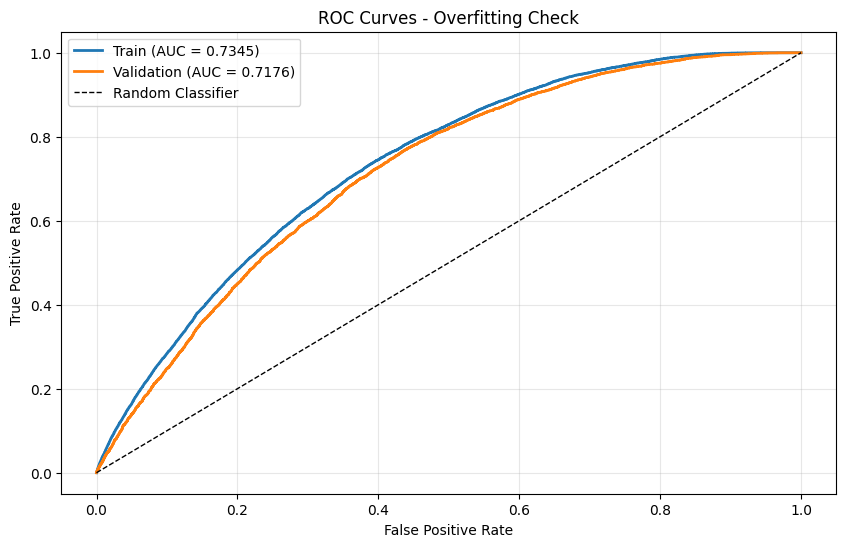

Train AUC: 0.7345
Validation AUC: 0.7176
Difference: 0.0169


In [15]:
# overfit checking
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
pred_on_train = get_study_predictions("None_XGBClassifier_LogLoss_INGHubsMetric", X_train, y_train, X_train)
pred_on_test = get_study_predictions("None_XGBClassifier_LogLoss_INGHubsMetric", X_train, y_train, X_val)

import matplotlib.pyplot as plt

# Calculate AUC scores
auc_train = roc_auc_score(y_train, pred_on_train)
auc_val = roc_auc_score(y_val, pred_on_test)

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, pred_on_train)
fpr_val, tpr_val, _ = roc_curve(y_val, pred_on_test)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {auc_train:.4f})', linewidth=2)
plt.plot(fpr_val, tpr_val, label=f'Validation (AUC = {auc_val:.4f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Overfitting Check')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Train AUC: {auc_train:.4f}")
print(f"Validation AUC: {auc_val:.4f}")
print(f"Difference: {abs(auc_train - auc_val):.4f}")


In [13]:
y_pred_proba = get_study_predictions("None_XGBClassifier_LogLoss_INGHubsMetric", X, y, X_test)

✓ XGBoost trained on 133287 samples using saved best_params


array([0.42352092, 0.48377448, 0.6355636 , ..., 0.47084504, 0.21451841,
       0.33118418], shape=(43006,), dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

y_pred_proba = fit_predict_best_study_from_json(study1_json, X, y, X_test)


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

submission = ref_test.copy()
submission['churn'] = y_pred_proba

print(submission.head())


✓ XGBoost trained on 133287 samples using saved best_params
   cust_id    ref_date     churn
0        1  2019-02-01  0.423521
1        2  2019-01-01  0.483774
2        9  2019-03-01  0.635564
3       15  2019-06-01  0.577826
4       19  2019-01-01  0.320431


In [109]:
study2 = studies["RandomOverSampler_XGBClassifier_LogLoss_INGHubsMetric"].optimize(X, y)

  0%|          | 0/5 [00:00<?, ?it/s]


Study Name: RandomOverSampler_XGBClassifier_LogLoss_INGHubsMetric
  Train size: 183066, Val size: 26658
  Train class dist: [91533 91533]
  Val class dist: [22884  3774]
  Pred proba range: [0.0000, 0.9813]
  Pred labels dist: [24133  2525]
[I 2025-10-20 23:47:59] Trial 0 finished with value: 0.95 and parameters: {'n_estimators': 574, 'learning_rate': '0.23', 'max_depth': 8, 'min_child_weight': '0.63', 'subsample': '0.58', 'colsample_bytree': '0.58', 'gamma': '0.58', 'reg_alpha': '0.62', 'reg_lambda': '0.00', 'max_bin': 400}. Best is trial 0 with value: 0.95.
[I 2025-10-20 23:48:29] Trial 1 finished with value: 0.93 and parameters: {'n_estimators': 220, 'learning_rate': '0.25', 'max_depth': 9, 'min_child_weight': '0.04', 'subsample': '0.59', 'colsample_bytree': '0.59', 'gamma': '3.04', 'reg_alpha': '0.00', 'reg_lambda': '0.00', 'max_bin': 240}. Best is trial 0 with value: 0.95.
[I 2025-10-20 23:49:47] Trial 2 finished with value: 1.17 and parameters: {'n_estimators': 812, 'learning_ra

In [78]:
study3 = studies["SMOTE_XGBClassifier_LogLoss_INGHubsMetric"].optimize(X, y)

  0%|          | 0/5 [00:00<?, ?it/s]

/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values). Skipping sampling.
  warnings.warn(



Study Name: SMOTE_XGBClassifier_LogLoss_INGHubsMetric
  Train size: 106629, Val size: 26658
  Train class dist: [91533 15096]
  Val class dist: [22884  3774]
  Pred proba range: [0.0126, 0.7503]
  Pred labels dist: [26581    77]


/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values). Skipping sampling.
  warnings.warn(
/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not

[I 2025-10-20 20:23:46] Trial 0 finished with value: 1.01 and parameters: {'n_estimators': 574, 'learning_rate': '0.23', 'max_depth': 8, 'min_child_weight': '0.63', 'subsample': '0.58', 'colsample_bytree': '0.58', 'gamma': '0.58', 'reg_alpha': '0.62', 'reg_lambda': '0.00', 'max_bin': 400}. Best is trial 0 with value: 1.01.


/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values). Skipping sampling.
  warnings.warn(
/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not

[I 2025-10-20 20:23:50] Trial 1 finished with value: 0.97 and parameters: {'n_estimators': 220, 'learning_rate': '0.25', 'max_depth': 9, 'min_child_weight': '0.04', 'subsample': '0.59', 'colsample_bytree': '0.59', 'gamma': '3.04', 'reg_alpha': '0.00', 'reg_lambda': '0.00', 'max_bin': 240}. Best is trial 0 with value: 1.01.


/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values). Skipping sampling.
  warnings.warn(
/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not

[I 2025-10-20 20:24:16] Trial 2 finished with value: 1.08 and parameters: {'n_estimators': 812, 'learning_rate': '0.00', 'max_depth': 5, 'min_child_weight': '0.13', 'subsample': '0.73', 'colsample_bytree': '0.89', 'gamma': '2.00', 'reg_alpha': '0.00', 'reg_lambda': '0.00', 'max_bin': 145}. Best is trial 2 with value: 1.08.


/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values). Skipping sampling.
  warnings.warn(
/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not

[I 2025-10-20 20:24:37] Trial 3 finished with value: 1.06 and parameters: {'n_estimators': 808, 'learning_rate': '0.00', 'max_depth': 3, 'min_child_weight': '7.03', 'subsample': '0.98', 'colsample_bytree': '0.90', 'gamma': '3.05', 'reg_alpha': '0.00', 'reg_lambda': '0.01', 'max_bin': 297}. Best is trial 2 with value: 1.08.


/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values). Skipping sampling.
  warnings.warn(
/Users/yasin.secal/Desktop/yasins/ing_hubs/ing-datathon-team-guney-kampus/utils/ml_functions.py:411: UserWarning: Sampler SMOTE failed on this fold (Input X contains NaN.
SMOTE does not

[I 2025-10-20 20:24:46] Trial 4 finished with value: 1.08 and parameters: {'n_estimators': 322, 'learning_rate': '0.02', 'max_depth': 3, 'min_child_weight': '5.35', 'subsample': '0.63', 'colsample_bytree': '0.83', 'gamma': '3.12', 'reg_alpha': '0.00', 'reg_lambda': '0.00', 'max_bin': 199}. Best is trial 2 with value: 1.08.


In [ ]:
study4 = studies["SMOTE_RandomForestClassifier_LogLoss_INGHubsMetric"].optimize(X, y)

In [84]:
X.fillna(0, inplace=True)

In [95]:
submission.to_csv(str(repo_root) + '/submission_xgboost_smote.csv', index=False)